<a href="https://colab.research.google.com/github/rburakkorkmaz/CSE-406_Scientific-Programming/blob/main/KorkmazRamazanBurak_MT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Midterm</strong></h1>
<h3><strong>Student Name:</strong> Ramazan Burak Korkmaz</h3>
<h3><strong>Student ID:</strong> 202151056004</h3>

In [145]:
import numpy as np
import scipy.optimize as opt
from scipy.spatial.distance import cdist
import math

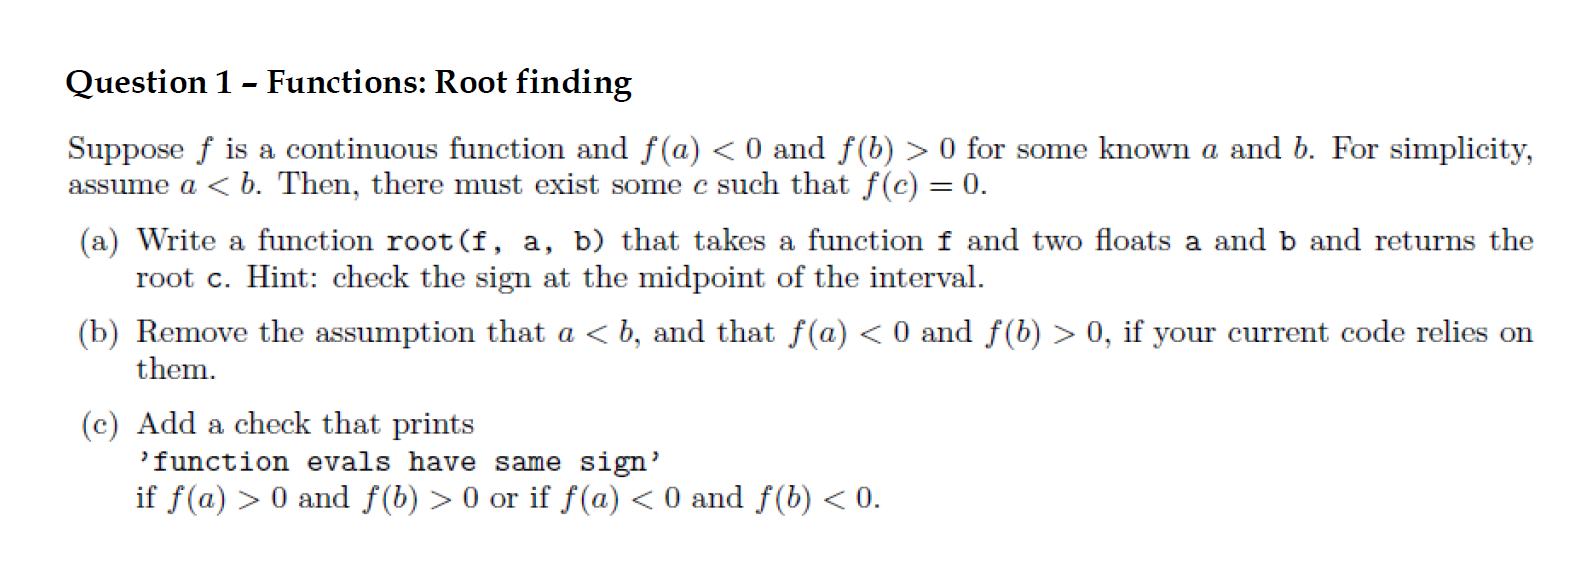

In [146]:
# Function to test
def f(x):
  return ((x - 4)**2 - 4)

In [147]:
# A little different from the question but same idea.
# This function will return ALL roots, not only C
def root(f, a, b):
  # Answer to the C 
  if f(a) * f(b) > 0:
      print("Function evals have same sign")

  # Boolean to check if recently a sign change occured
  sign_change = False

  # List to store roots found
  roots = []

  # Initial step size
  step_size = (abs(a) + abs(b)) / 10

  # Each time a sign change occured decrease step_size this much
  decrease_size = (abs(a) + abs(b)) / 100

  # Stores recent two values. First index is one before current and index 1 is
  # up to date value
  value_history = [None, f(a)]

  # Start from smaller one. Stop at bigger one
  step = a if a < b else b
  stop = a if a > b else b

  # Loop that searchs for roots between a and b values
  while step != stop:
    # If there is a sing change, instead of increasing start decreasing step
    # In other words, go back
    if sign_change:
      step -= step_size
    else:
      step += step_size
    
    # Store values
    value_history[0] = value_history[1]
    value_history[1] = f(step)

    # Check if we found a root
    # If we don't find a root, check if there is a sign change
    if value_history[1] == 0:
      roots.append(step)
    elif value_history[0] * value_history[1] < 0:
      sign_change = True
      step_size -= decrease_size

  # Print found roots
  print(f"Roots found: {roots}")


In [148]:
root(f, -10, 10)

Function evals have same sign
Roots found: [2.0, 6.0]


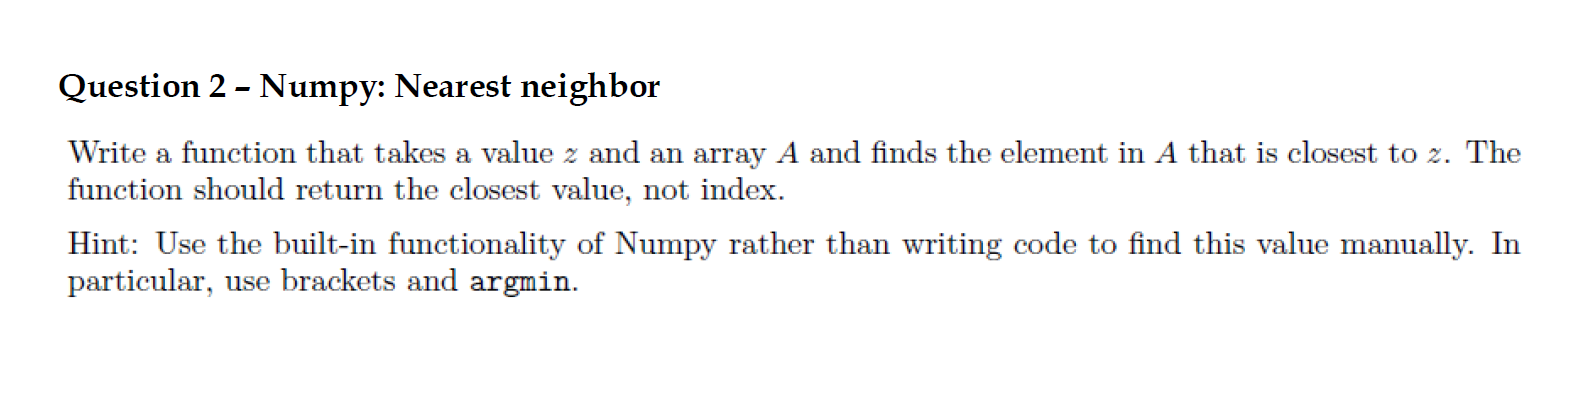

In [149]:
def nearest_neighbor(z, A):
  
  # Create a all elements z matrix
  z_matrix = z*np.ones((len(A), len(A)))

  # Subtract z matrix from A so we can find difference between
  # each element
  temp = abs(A - z_matrix)

  # Min. distance will be closest value so we check temp array with argmin func.
  row, column = np.unravel_index(np.argmin(temp, axis=None), temp.shape)
  return A[row][column]

In [150]:
A = np.random.rand(5,5)
print(A)
print("******************************************************")
closest = nearest_neighbor(0.5, A)
print(f"Closest value is {closest}")

[[0.57508352 0.51437515 0.38546802 0.80096431 0.30981456]
 [0.06535034 0.05696498 0.29284205 0.16571248 0.11025106]
 [0.23351044 0.69379377 0.41836636 0.23036269 0.49217103]
 [0.12405015 0.62033177 0.08403414 0.83277309 0.76588034]
 [0.45675724 0.60717544 0.58308236 0.82331413 0.60402069]]
******************************************************
Closest value is 0.49217102544568314


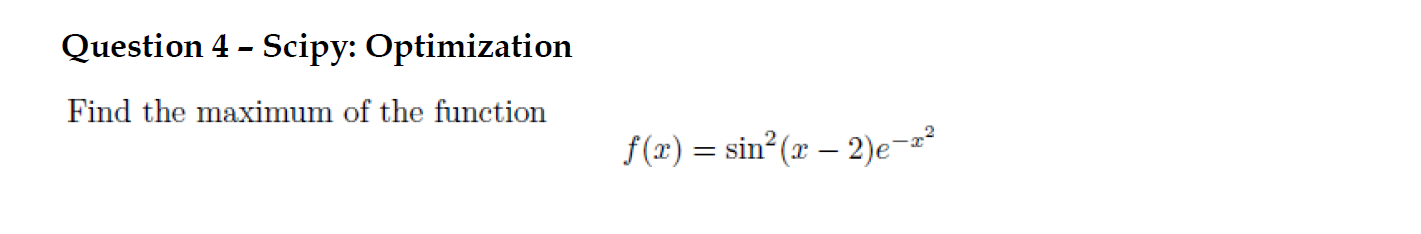

In [151]:
# Create negative of given function so we can find min. of it. After
# that we simply negative of output and it will be the max
def negative_func(x):
  return -1 * (math.sin(x -2) ** 2) * math.exp(-1 * (x ** 2))

In [152]:
# Find x 
max_x = (opt.minimize_scalar(negative_func).x)
print(-1 * negative_func(max_x))

0.9116854118471548


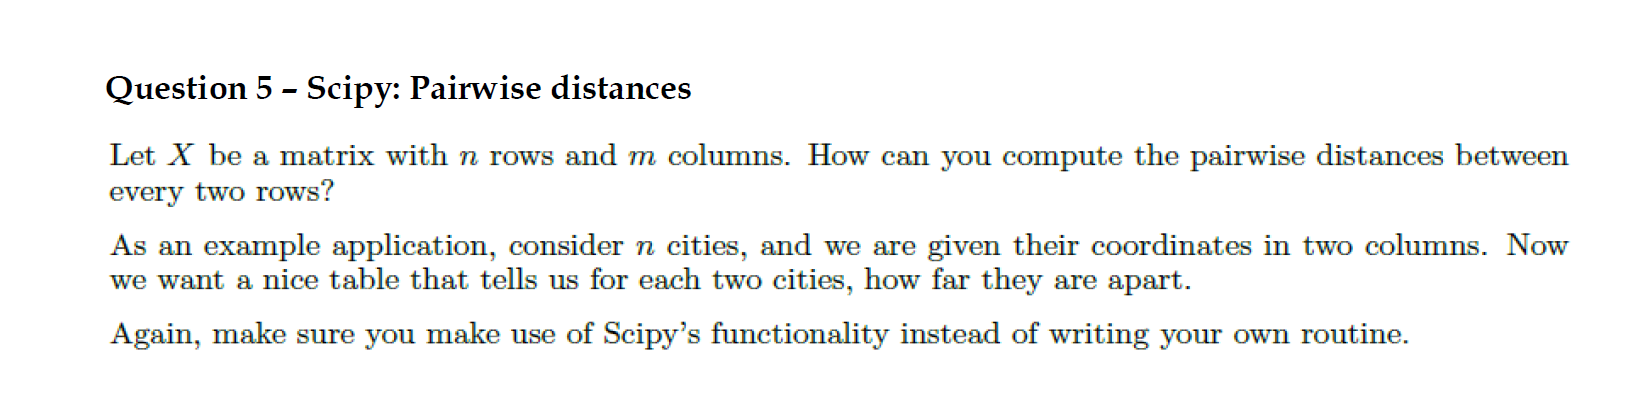

In [153]:
# Dimensions of the array
n = 20
m = 30

In [154]:
# Create X Matrix
x_matrix = np.random.randint(-5, 8, size = (n, m))

In [155]:
# Calculate distance row wise
row_wise_distance = cdist(x_matrix, x_matrix, 'euclidean')

In [156]:
# Print raw array of distances
print(row_wise_distance)

[[ 0.         32.92415527 28.7923601  22.11334439 32.87856445 28.63564213
  31.85906464 31.93743885 23.51595203 27.64054992 33.48133809 29.63106478
  25.41653005 30.6757233  28.42534081 28.68797658 29.13760457 28.53068524
  30.82207001 25.59296778]
 [32.92415527  0.         26.21068484 30.41381265 29.24038303 31.96873473
  30.96772513 31.11269837 29.68164416 29.63106478 26.36285265 30.43024811
  34.         32.81767816 26.68332813 29.58039892 35.08560959 31.33687923
  28.77498914 26.73948391]
 [28.7923601  26.21068484  0.         33.76388603 28.28427125 26.43860813
  33.13608305 28.47806173 30.19933774 28.96549672 32.24903099 21.14237451
  29.03446228 25.13961018 28.68797658 32.28002478 28.91366459 32.01562119
  27.54995463 24.97999199]
 [22.11334439 30.41381265 33.76388603  0.         31.43246729 32.32645975
  31.52776554 31.0322413  23.06512519 30.41381265 30.85449724 33.51119216
  27.58622845 32.46536616 28.37252192 33.49626845 33.52610923 27.87471973
  32.87856445 28.42534081]
 [32